# Regresión logística usando Scikit Learn

## Importar nuestras librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar y explorar nuestro set de datos

In [2]:
from sklearn.datasets import fetch_openml

data, target = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [3]:
data.shape

(70000, 784)

In [4]:
target.shape

(70000,)

In [5]:
digit_sample = data[0]
digit_sample

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Al ser un problema de aprendizaje supervisado contamos con datos ya etiquetados a los que queremos llegar como resultado.

In [6]:
# 70000 labels para cada imagen
sample_label = target[0]
sample_label

'5'

## Graficando nuestra imagen

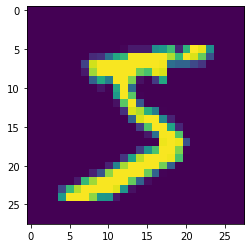

In [7]:
plt.imshow(digit_sample.reshape(28,28))

## Graficando varias imagenes

In [8]:
numbers_sample = list(zip(data[30:35], target[30:35]))
np.array(numbers_sample).shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


(5, 2)

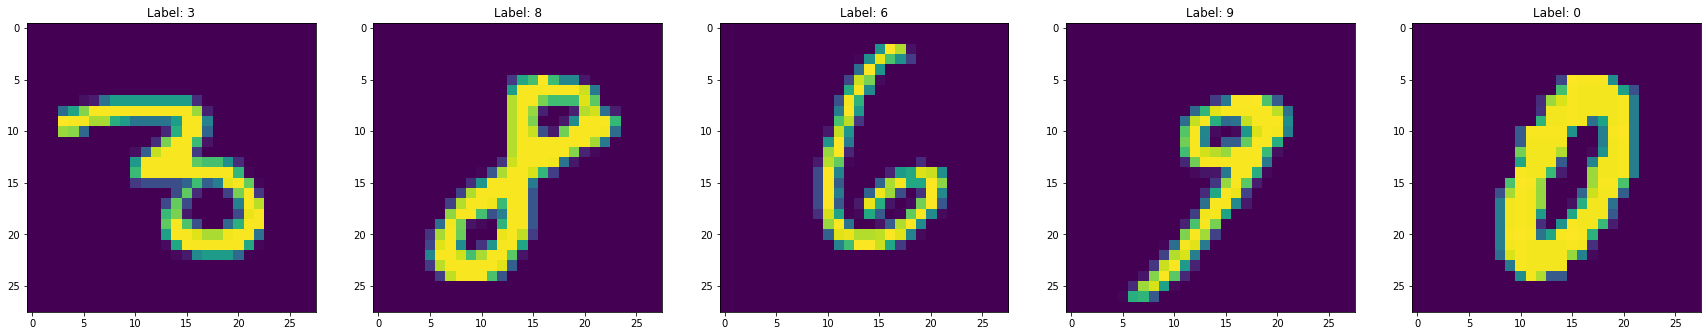

In [9]:
plt.figure(figsize=(30,30))
for index, (image,label) in enumerate(numbers_sample):
  reshaped_image = np.reshape(image, (28,28))
  plt.subplot(1, len(numbers_sample), index + 1)
  plt.imshow(reshaped_image)
  plt.title(f"Label: {label}")

## Fase de entranamiento



### 1. Dividiendo nuestro set de datos en entrenamiento y pruebas

In [10]:
from sklearn.model_selection import train_test_split

train_samples = 20000

x_train, x_test, y_train, y_test = train_test_split(data, target,train_size=train_samples, test_size=10000, random_state=42)
print("Tamaño de nuestros datos de entrenamiento: ", len(x_train))
print("Tamaño de nuestros datos de prueba: ", len(x_test))

Tamaño de nuestros datos de entrenamiento:  20000
Tamaño de nuestros datos de prueba:  10000


### 2. Importando nuestro modelo

In [11]:
from sklearn.linear_model import LogisticRegression

### 3. Creando la instancia de nuestro modelo

Creamos nuestro pipeline

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# El solver es un optimizador, esto para encontrar el valor mínimo. Funciona en data sets largos y con datos escalados
# La tolerancia es que tan lejos en distancia el solver parará la busqueda del mínimo.

clf = LogisticRegression(solver='saga', tol=0.01)

pipe = make_pipeline(StandardScaler(), clf)

### 4. Entrenando nuestro modelo 



Estandariza nuestros datos y después entrena el modelo

In [13]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='saga', tol=0.01, verbose=0,
                                    warm_start=False))],
         verbose=False)

## Evaluando nuestro modelo

La regresión logística con Scikit-Learn usa por defecto la presición como métrica de evaluación del modelo. La presición se define como: 

$${\text{Precisión}=\frac{\text{Número de predicciones correctas}}{\text{Número total de predicciones}}}$$

In [14]:
score = pipe.score(x_test, y_test)
score

0.9065

## Haciendo una predicción con nuestro modelo

In [15]:
guinea_pig = x_test[0]
pipe.predict(guinea_pig.reshape(1,-1))

array(['8'], dtype=object)

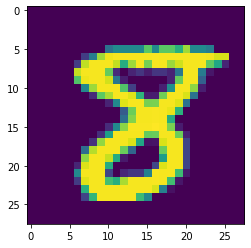

In [16]:
plt.imshow(guinea_pig.reshape(28,28))

In [17]:
predictions = pipe.predict(x_test)
predictions

array(['8', '4', '5', ..., '3', '3', '3'], dtype=object)

## Creando y graficando una matriz de confusión 

Una matriz de confusión es una forma de visualizar el desempéño de nuestro algoritmo comparando el valor actual de la etiqueta vs el de la predicción realizada por el modelo.

In [18]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[ 943,    1,    6,    2,    0,   10,   10,    3,    7,    1],
       [   0, 1117,    3,    7,    0,    5,    1,    6,   12,    1],
       [  11,   19,  861,   14,   12,    1,   15,   14,   19,    1],
       [   3,   13,   28,  903,    3,   35,    5,   16,   16,   12],
       [   2,    5,    6,    2,  837,    3,    8,    4,    5,   34],
       [   9,   13,    6,   41,   14,  799,   10,    6,   31,    8],
       [   6,    9,    9,    0,   10,   17,  905,    1,    4,    0],
       [   4,   16,   11,    1,   14,    1,    0,  986,    0,   22],
       [  11,   39,   18,   35,    9,   27,   10,    9,  793,   18],
       [   7,    7,    5,   15,   37,    3,    0,   34,    7,  921]])

Text(60.0, 0.5, 'Valor actual')

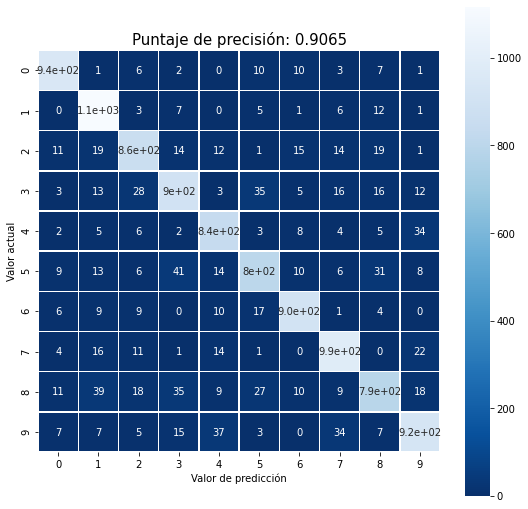

In [19]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap="Blues_r")
plt.title(f"Puntaje de precisión: {score}", fontsize=15)
plt.xlabel("Valor de predicción")
plt.ylabel("Valor actual")